## **09. Representasi Pengetahuan (Knowledge Representation)**

---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_testing = pd.read_csv('sorted_topic_cluster_counts.csv')

data_testing


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,cleaned_tweet,topic_cluster,emotion,number_of_topic,text
0,1800679330726715550,Tue Jun 11 23:59:42 +0000 2024,1,TIMNAS PRIA DAN WANITA MENANG + ERIK TEN HAG STAY,1800679330726715550,NaN,NaN,in,Indonesia,0,0,0,https://x.com/tigapuluhtigax/status/1800679330...,1188470356668895234,tigapuluhtigax,timnas pria wanita menang erik ten hag stay,3,Joy,NaN,NaN
1,1800679305925800015,Tue Jun 11 23:59:36 +0000 2024,1,ngerasa ga sih sekarang timnas kalo main pakek...,1800679305925800015,NaN,NaN,in,"Jombang, Indonesia",0,0,0,https://x.com/sotongism/status/180067930592580...,961056397063409664,sotongism,ngerasa ga sih timnas kalo main pakek jersey p...,3,Fear,NaN,NaN
2,1800679288326476196,Tue Jun 11 23:59:31 +0000 2024,0,2 Sejarah Dicetak Timnas Indonesia Usai Ganyan...,1800679288326476196,NaN,NaN,in,NaN,0,0,0,https://x.com/peanutkacang123/status/180067928...,1464596330421100548,peanutkacang123,sejarah dicetak timnas indonesia ganyang filip...,3,Joy,NaN,NaN
3,1800589420766355730,Tue Jun 11 23:59:28 +0000 2024,0,@womensfootie_id Tinggal tmbah pemain diaspora...,1800679273185047018,NaN,womensfootie_id,in,NaN,0,0,0,https://x.com/PKananku1927/status/180067927318...,1772880651248939008,PKananku1927,tinggal tmbah pemain diaspora timnas putri ber...,1,Neutral,NaN,NaN
4,1800679270857286043,Tue Jun 11 23:59:27 +0000 2024,0,Timnas Indonesia Vs Timnas Filipina 2-0 Indone...,1800679270857286043,NaN,NaN,in,NaN,0,0,0,https://x.com/kangsil2012/status/1800679270857...,546890263,kangsil2012,timnas indonesia vs timnas filipina indonesia ...,2,Joy,3.0,Banyak pembicaraan tentang keberhasilan timnas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,1800537380392419660,Tue Jun 11 15:56:14 +0000 2024,0,@cingreborn aaak seneng banget guee #timnasday,1800557666047254585,NaN,cingreborn,in,NaN,0,0,0,https://x.com/kidleaderr/status/18005576660472...,1294225010924466177,kidleaderr,aaak seneng banget guee,0,Joy,NaN,NaN
1876,1800557640936038793,Tue Jun 11 15:56:08 +0000 2024,0,PREDIKSI TOGEL OREGON 04 12 JUNI 2024 ANGKA MA...,1800557640936038793,https://pbs.twimg.com/media/GPzdn55aMAA1CUe.png,NaN,in,NaN,0,0,0,https://x.com/yupitoto88/status/18005576409360...,1746107999226085376,yupitoto88,prediksi togel oregon juni angka main colok be...,0,Neutral,NaN,NaN
1877,1800557615824744466,Tue Jun 11 15:56:03 +0000 2024,0,Timnas menang tapi aku tetep kalah karo dee si...,1800557615824744466,NaN,NaN,in,NaN,0,0,0,https://x.com/Lalalan111111/status/18005576158...,1552276761194274816,Lalalan111111,timnas menang tetep kalah karo dee sik mbok ga...,0,Sad,NaN,NaN
1878,1800557601232691595,Tue Jun 11 15:55:59 +0000 2024,0,buat mas mas belakang gue minta aidrop gol ked...,1800557601232691595,NaN,NaN,in,NaN,0,1,0,https://x.com/celestiaalsky/status/18005576012...,1761777254135394304,celestiaalsky,mas mas aidrop gol maaf banget salah kirim dik...,0,Sad,NaN,NaN


In [3]:
merged_df = data_testing

merged_df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,cleaned_tweet,topic_cluster,emotion,number_of_topic,text
0,1800679330726715550,Tue Jun 11 23:59:42 +0000 2024,1,TIMNAS PRIA DAN WANITA MENANG + ERIK TEN HAG STAY,1800679330726715550,NaN,NaN,in,Indonesia,0,0,0,https://x.com/tigapuluhtigax/status/1800679330...,1188470356668895234,tigapuluhtigax,timnas pria wanita menang erik ten hag stay,3,Joy,NaN,NaN
1,1800679305925800015,Tue Jun 11 23:59:36 +0000 2024,1,ngerasa ga sih sekarang timnas kalo main pakek...,1800679305925800015,NaN,NaN,in,"Jombang, Indonesia",0,0,0,https://x.com/sotongism/status/180067930592580...,961056397063409664,sotongism,ngerasa ga sih timnas kalo main pakek jersey p...,3,Fear,NaN,NaN
2,1800679288326476196,Tue Jun 11 23:59:31 +0000 2024,0,2 Sejarah Dicetak Timnas Indonesia Usai Ganyan...,1800679288326476196,NaN,NaN,in,NaN,0,0,0,https://x.com/peanutkacang123/status/180067928...,1464596330421100548,peanutkacang123,sejarah dicetak timnas indonesia ganyang filip...,3,Joy,NaN,NaN
3,1800589420766355730,Tue Jun 11 23:59:28 +0000 2024,0,@womensfootie_id Tinggal tmbah pemain diaspora...,1800679273185047018,NaN,womensfootie_id,in,NaN,0,0,0,https://x.com/PKananku1927/status/180067927318...,1772880651248939008,PKananku1927,tinggal tmbah pemain diaspora timnas putri ber...,1,Neutral,NaN,NaN
4,1800679270857286043,Tue Jun 11 23:59:27 +0000 2024,0,Timnas Indonesia Vs Timnas Filipina 2-0 Indone...,1800679270857286043,NaN,NaN,in,NaN,0,0,0,https://x.com/kangsil2012/status/1800679270857...,546890263,kangsil2012,timnas indonesia vs timnas filipina indonesia ...,2,Joy,3.0,Banyak pembicaraan tentang keberhasilan timnas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,1800537380392419660,Tue Jun 11 15:56:14 +0000 2024,0,@cingreborn aaak seneng banget guee #timnasday,1800557666047254585,NaN,cingreborn,in,NaN,0,0,0,https://x.com/kidleaderr/status/18005576660472...,1294225010924466177,kidleaderr,aaak seneng banget guee,0,Joy,NaN,NaN
1876,1800557640936038793,Tue Jun 11 15:56:08 +0000 2024,0,PREDIKSI TOGEL OREGON 04 12 JUNI 2024 ANGKA MA...,1800557640936038793,https://pbs.twimg.com/media/GPzdn55aMAA1CUe.png,NaN,in,NaN,0,0,0,https://x.com/yupitoto88/status/18005576409360...,1746107999226085376,yupitoto88,prediksi togel oregon juni angka main colok be...,0,Neutral,NaN,NaN
1877,1800557615824744466,Tue Jun 11 15:56:03 +0000 2024,0,Timnas menang tapi aku tetep kalah karo dee si...,1800557615824744466,NaN,NaN,in,NaN,0,0,0,https://x.com/Lalalan111111/status/18005576158...,1552276761194274816,Lalalan111111,timnas menang tetep kalah karo dee sik mbok ga...,0,Sad,NaN,NaN
1878,1800557601232691595,Tue Jun 11 15:55:59 +0000 2024,0,buat mas mas belakang gue minta aidrop gol ked...,1800557601232691595,NaN,NaN,in,NaN,0,1,0,https://x.com/celestiaalsky/status/18005576012...,1761777254135394304,celestiaalsky,mas mas aidrop gol maaf banget salah kirim dik...,0,Sad,NaN,NaN


In [4]:
jumlah_nan = merged_df.isna().sum()

print(jumlah_nan)

conversation_id_str           0
created_at                    0
favorite_count                0
full_text                     0
id_str                        0
image_url                  1420
in_reply_to_screen_name    1137
lang                          0
location                    836
quote_count                   0
reply_count                   0
retweet_count                 0
tweet_url                     0
user_id_str                   0
username                      0
cleaned_tweet                 2
topic_cluster                 0
emotion                       0
number_of_topic             972
text                        972
dtype: int64


In [5]:
merged_df = merged_df.dropna(subset=['emotion'])

merged_df


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,cleaned_tweet,topic_cluster,emotion,number_of_topic,text
0,1800679330726715550,Tue Jun 11 23:59:42 +0000 2024,1,TIMNAS PRIA DAN WANITA MENANG + ERIK TEN HAG STAY,1800679330726715550,NaN,NaN,in,Indonesia,0,0,0,https://x.com/tigapuluhtigax/status/1800679330...,1188470356668895234,tigapuluhtigax,timnas pria wanita menang erik ten hag stay,3,Joy,NaN,NaN
1,1800679305925800015,Tue Jun 11 23:59:36 +0000 2024,1,ngerasa ga sih sekarang timnas kalo main pakek...,1800679305925800015,NaN,NaN,in,"Jombang, Indonesia",0,0,0,https://x.com/sotongism/status/180067930592580...,961056397063409664,sotongism,ngerasa ga sih timnas kalo main pakek jersey p...,3,Fear,NaN,NaN
2,1800679288326476196,Tue Jun 11 23:59:31 +0000 2024,0,2 Sejarah Dicetak Timnas Indonesia Usai Ganyan...,1800679288326476196,NaN,NaN,in,NaN,0,0,0,https://x.com/peanutkacang123/status/180067928...,1464596330421100548,peanutkacang123,sejarah dicetak timnas indonesia ganyang filip...,3,Joy,NaN,NaN
3,1800589420766355730,Tue Jun 11 23:59:28 +0000 2024,0,@womensfootie_id Tinggal tmbah pemain diaspora...,1800679273185047018,NaN,womensfootie_id,in,NaN,0,0,0,https://x.com/PKananku1927/status/180067927318...,1772880651248939008,PKananku1927,tinggal tmbah pemain diaspora timnas putri ber...,1,Neutral,NaN,NaN
4,1800679270857286043,Tue Jun 11 23:59:27 +0000 2024,0,Timnas Indonesia Vs Timnas Filipina 2-0 Indone...,1800679270857286043,NaN,NaN,in,NaN,0,0,0,https://x.com/kangsil2012/status/1800679270857...,546890263,kangsil2012,timnas indonesia vs timnas filipina indonesia ...,2,Joy,3.0,Banyak pembicaraan tentang keberhasilan timnas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,1800537380392419660,Tue Jun 11 15:56:14 +0000 2024,0,@cingreborn aaak seneng banget guee #timnasday,1800557666047254585,NaN,cingreborn,in,NaN,0,0,0,https://x.com/kidleaderr/status/18005576660472...,1294225010924466177,kidleaderr,aaak seneng banget guee,0,Joy,NaN,NaN
1876,1800557640936038793,Tue Jun 11 15:56:08 +0000 2024,0,PREDIKSI TOGEL OREGON 04 12 JUNI 2024 ANGKA MA...,1800557640936038793,https://pbs.twimg.com/media/GPzdn55aMAA1CUe.png,NaN,in,NaN,0,0,0,https://x.com/yupitoto88/status/18005576409360...,1746107999226085376,yupitoto88,prediksi togel oregon juni angka main colok be...,0,Neutral,NaN,NaN
1877,1800557615824744466,Tue Jun 11 15:56:03 +0000 2024,0,Timnas menang tapi aku tetep kalah karo dee si...,1800557615824744466,NaN,NaN,in,NaN,0,0,0,https://x.com/Lalalan111111/status/18005576158...,1552276761194274816,Lalalan111111,timnas menang tetep kalah karo dee sik mbok ga...,0,Sad,NaN,NaN
1878,1800557601232691595,Tue Jun 11 15:55:59 +0000 2024,0,buat mas mas belakang gue minta aidrop gol ked...,1800557601232691595,NaN,NaN,in,NaN,0,1,0,https://x.com/celestiaalsky/status/18005576012...,1761777254135394304,celestiaalsky,mas mas aidrop gol maaf banget salah kirim dik...,0,Sad,NaN,NaN


In [6]:
#drop duplicated data in full_text
merged_df = merged_df.drop_duplicates(subset=['full_text'])

merged_df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,cleaned_tweet,topic_cluster,emotion,number_of_topic,text
0,1800679330726715550,Tue Jun 11 23:59:42 +0000 2024,1,TIMNAS PRIA DAN WANITA MENANG + ERIK TEN HAG STAY,1800679330726715550,NaN,NaN,in,Indonesia,0,0,0,https://x.com/tigapuluhtigax/status/1800679330...,1188470356668895234,tigapuluhtigax,timnas pria wanita menang erik ten hag stay,3,Joy,NaN,NaN
1,1800679305925800015,Tue Jun 11 23:59:36 +0000 2024,1,ngerasa ga sih sekarang timnas kalo main pakek...,1800679305925800015,NaN,NaN,in,"Jombang, Indonesia",0,0,0,https://x.com/sotongism/status/180067930592580...,961056397063409664,sotongism,ngerasa ga sih timnas kalo main pakek jersey p...,3,Fear,NaN,NaN
2,1800679288326476196,Tue Jun 11 23:59:31 +0000 2024,0,2 Sejarah Dicetak Timnas Indonesia Usai Ganyan...,1800679288326476196,NaN,NaN,in,NaN,0,0,0,https://x.com/peanutkacang123/status/180067928...,1464596330421100548,peanutkacang123,sejarah dicetak timnas indonesia ganyang filip...,3,Joy,NaN,NaN
3,1800589420766355730,Tue Jun 11 23:59:28 +0000 2024,0,@womensfootie_id Tinggal tmbah pemain diaspora...,1800679273185047018,NaN,womensfootie_id,in,NaN,0,0,0,https://x.com/PKananku1927/status/180067927318...,1772880651248939008,PKananku1927,tinggal tmbah pemain diaspora timnas putri ber...,1,Neutral,NaN,NaN
4,1800679270857286043,Tue Jun 11 23:59:27 +0000 2024,0,Timnas Indonesia Vs Timnas Filipina 2-0 Indone...,1800679270857286043,NaN,NaN,in,NaN,0,0,0,https://x.com/kangsil2012/status/1800679270857...,546890263,kangsil2012,timnas indonesia vs timnas filipina indonesia ...,2,Joy,3.0,Banyak pembicaraan tentang keberhasilan timnas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,1800537380392419660,Tue Jun 11 15:56:14 +0000 2024,0,@cingreborn aaak seneng banget guee #timnasday,1800557666047254585,NaN,cingreborn,in,NaN,0,0,0,https://x.com/kidleaderr/status/18005576660472...,1294225010924466177,kidleaderr,aaak seneng banget guee,0,Joy,NaN,NaN
1876,1800557640936038793,Tue Jun 11 15:56:08 +0000 2024,0,PREDIKSI TOGEL OREGON 04 12 JUNI 2024 ANGKA MA...,1800557640936038793,https://pbs.twimg.com/media/GPzdn55aMAA1CUe.png,NaN,in,NaN,0,0,0,https://x.com/yupitoto88/status/18005576409360...,1746107999226085376,yupitoto88,prediksi togel oregon juni angka main colok be...,0,Neutral,NaN,NaN
1877,1800557615824744466,Tue Jun 11 15:56:03 +0000 2024,0,Timnas menang tapi aku tetep kalah karo dee si...,1800557615824744466,NaN,NaN,in,NaN,0,0,0,https://x.com/Lalalan111111/status/18005576158...,1552276761194274816,Lalalan111111,timnas menang tetep kalah karo dee sik mbok ga...,0,Sad,NaN,NaN
1878,1800557601232691595,Tue Jun 11 15:55:59 +0000 2024,0,buat mas mas belakang gue minta aidrop gol ked...,1800557601232691595,NaN,NaN,in,NaN,0,1,0,https://x.com/celestiaalsky/status/18005576012...,1761777254135394304,celestiaalsky,mas mas aidrop gol maaf banget salah kirim dik...,0,Sad,NaN,NaN


## Knowledge

### Per-Topic

In [7]:
topic_cluster_counts = merged_df['topic_cluster'].value_counts().reset_index()
topic_cluster_counts

,topic_cluster,count
0,0,370
1,1,297
2,2,290
3,3,220
4,4,188
5,5,165
6,6,95
7,7,88
8,8,85
9,9,82


In [8]:
# Menghitung jumlah kemunculan masing-masing 'topic_cluster'
topic_cluster_counts = merged_df['topic_cluster'].value_counts().reset_index()
topic_cluster_counts.columns = ['topic_cluster', 'count']

# Mengurutkan berdasarkan kolom 'count' dalam urutan menurun
sorted_df = topic_cluster_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

# Membuat dictionary mapping dari urutan asli ke urutan baru
mapping = {row['topic_cluster']: i for i, row in sorted_df.iterrows()}

# Mengubah kolom 'topic_cluster' dalam dataframe asli dengan urutan baru
merged_df['topic_cluster'] = merged_df['topic_cluster'].map(mapping)

# Menampilkan dataframe yang sudah diubah
print(merged_df)

# Menyimpan dataframe yang sudah diubah ke dalam file CSV
merged_df.to_csv('sorted_topic_cluster_counts.csv', index=False)

      conversation_id_str                      created_at  favorite_count  \
0     1800679330726715550  Tue Jun 11 23:59:42 +0000 2024               1   
1     1800679305925800015  Tue Jun 11 23:59:36 +0000 2024               1   
2     1800679288326476196  Tue Jun 11 23:59:31 +0000 2024               0   
3     1800589420766355730  Tue Jun 11 23:59:28 +0000 2024               0   
4     1800679270857286043  Tue Jun 11 23:59:27 +0000 2024               0   
...                   ...                             ...             ...   
1875  1800537380392419660  Tue Jun 11 15:56:14 +0000 2024               0   
1876  1800557640936038793  Tue Jun 11 15:56:08 +0000 2024               0   
1877  1800557615824744466  Tue Jun 11 15:56:03 +0000 2024               0   
1878  1800557601232691595  Tue Jun 11 15:55:59 +0000 2024               0   
1879  1800557593167020374  Tue Jun 11 15:55:57 +0000 2024               0   

                                              full_text               id_st

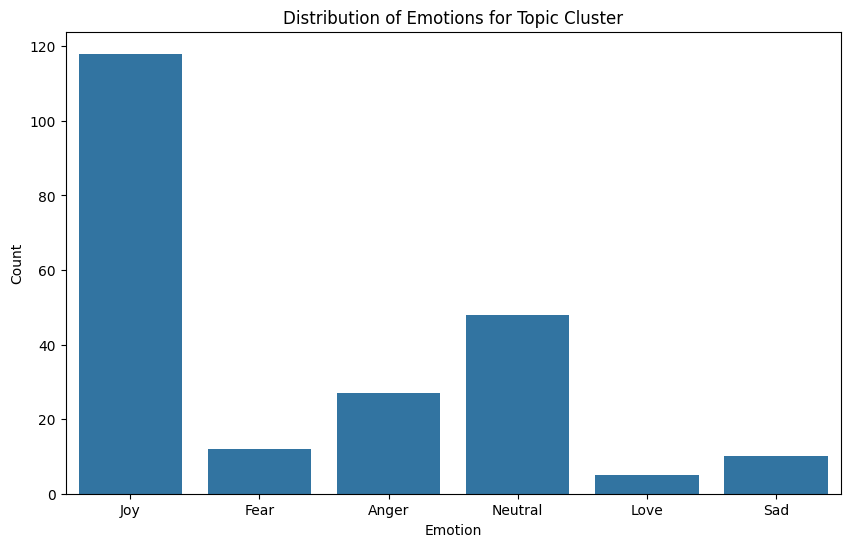

In [9]:
topic_cluster_0_df = merged_df[merged_df['topic_cluster'] == 3]

plt.figure(figsize=(10, 6))
sns.countplot(data=topic_cluster_0_df, x='emotion')

plt.title('Distribution of Emotions for Topic Cluster')
plt.xlabel('Emotion')
plt.ylabel('Count')

plt.show()

In [10]:
# Menemukan label emosi yang paling sering muncul
most_frequent_emotion = topic_cluster_0_df['emotion'].mode()[0]

print(f'Label emosi yang paling sering muncul dalam topic_cluster 0 adalah "{most_frequent_emotion}".')

# Menyaring baris dengan emosi yang paling sering muncul
emotion_df = topic_cluster_0_df[topic_cluster_0_df['emotion'] == most_frequent_emotion]

# Mengurutkan DataFrame berdasarkan kolom 'full_text'
emotion_df = emotion_df.sort_values('full_text', ascending=False)

# Menampilkan hanya kolom 'full_text' dan 'emotion'
emotion_df = emotion_df[['full_text', 'emotion']]

emotion_df

Label emosi yang paling sering muncul dalam topic_cluster 0 adalah "Joy".


,full_text,emotion
464,timnas menang gwe juga gk si ntar tgl 13,Joy
264,thank you for the hardworking teams! ga pernah...,Joy
355,sumpah tidurku nyenyak bgt jir akibat semalem ...,Joy
230,streets saying tiap abang jay main timnas sela...,Joy
50,seruu banget bacain berita dan komen tentang t...,Joy
...,...,...
179,@HabisNontonFilm Tolong match Timnas Indonesia...,Joy
316,@FajarMei925970 @garagarabola_ sekeren itu tim...,Joy
86,@00beinghuman Pemain yg dewasa sebelum umur ny...,Joy
83,8 Potret Tissa Biani Perdana Nonton Timnas di ...,Joy


# Konten Tentang Timnas Indonesia di Vidio

## 1. Dukungan Penggemar untuk Timnas Indonesia (Joy)
**Konten Senang**: Video yang menyoroti dukungan penuh dari para penggemar untuk Timnas Indonesia, termasuk ucapan selamat dan sorak-sorai setelah kemenangan dalam berbagai pertandingan.

**Contoh Tweet**:
> Dukungan luar biasa dari penggemar untuk Timnas Indonesia! 🎉 Saksikan momen-momen kegembiraan dan ucapan selamat untuk para pemain. #DukungTimnas [link video]

## 2. Perjalanan Timnas Indonesia di Babak Kualifikasi Piala Dunia dan Piala Asia (Joy)
**Konten Senang**: Video rekapitulasi perjalanan Timnas Indonesia di babak kualifikasi, termasuk momen-momen penting dan wawancara dengan pemain serta pelatih.

**Contoh Tweet**:
> Timnas Indonesia tampil impresif di kualifikasi Piala Dunia dan Piala Asia! 🎉 Saksikan rekap perjalanan mereka dan wawancara eksklusif. #TimnasKualifikasi [link video]

## 3. Keberhasilan Timnas Indonesia Lolos ke Putaran Ketiga Kualifikasi Piala Dunia 2026 (Joy)
**Konten Senang**: Cuplikan video dari momen-momen gol dan selebrasi pemain serta fans. Kutipan inspiratif dari pelatih dan pemain tentang perjalanan mereka menuju kualifikasi.

**Contoh Tweet**:
> Timnas Indonesia lolos ke putaran ketiga kualifikasi Piala Dunia 2026! 🎊 Saksikan momen-momen terbaik dan kegembiraan para pemain dan fans! #TimnasLolos [link video]

## 4. Penampilan Anang Menyanyikan "Indonesia Pusaka" Sebelum Pertandingan (Anger)
**Konten Marah**: Video atau artikel yang membahas reaksi emosional penggemar terhadap penampilan Anang menyanyikan "Indonesia Pusaka" sebelum pertandingan, dengan fokus pada kontroversi dan pendapat yang beragam.

**Contoh Tweet**:
> Penampilan Anang menyanyikan "Indonesia Pusaka" sebelum pertandingan menimbulkan berbagai reaksi. Apa pendapat kalian? #IndonesiaPusaka [link video]

## 4. Kemenangan Timnas Indonesia Melawan Filipina (Love)
**Konten Cinta**: Video reaksi penggemar yang menunjukkan dukungan dan kasih sayang mereka kepada pemain seperti Verdonk dan Haye. Testimoni dari fans tentang kecintaan mereka pada pemain dan tim.

**Contoh Tweet**:
> Dukungan luar biasa dari penggemar untuk Verdonk dan Haye! ❤️ Saksikan reaksi dan testimoni mereka tentang kecintaan pada Timnas Indonesia. #LoveForTimnas [link video]

## 6. Momen Bersejarah dan Gol Penting Timnas Indonesia (Joy)
**Konten Senang**: Cuplikan video dari momen-momen bersejarah dan gol-gol penting yang dicetak oleh Timnas Indonesia dalam babak kualifikasi dan turnamen AFF.

**Contoh Tweet**:
> Gol-gol bersejarah dari Timnas Indonesia di babak kualifikasi dan turnamen AFF! 🎊 Saksikan momen-momen terbaik di sini. #TimnasGol [link video]

## 7. Kondisi Rumput di Stadion Gelora Bung Karno Setelah Konser (Fear)
**Konten Takut**: Video yang menunjukkan kondisi rumput di Stadion Gelora Bung Karno setelah konser, dengan sorotan pada keluhan penggemar mengenai dampaknya pada performa timnas Indonesia di lapangan.

**Contoh Tweet**:
> Lihat kondisi rumput Stadion Gelora Bung Karno setelah konser dan bagaimana ini memengaruhi performa timnas Indonesia. #GBKRumput [link video]

## 8. Diskusi Strategi Pelatih Shin Tae-yong dan Potensi Pemain Diaspora (Joy)
**Konten Senang**: Video yang menyoroti strategi pelatih Shin Tae-yong dan performa pemain seperti Ernando dan Verdonk, termasuk diskusi tentang potensi pemain diaspora untuk memperkuat timnas.

**Contoh Tweet**:
> Lihat bagaimana strategi Shin Tae-yong membawa Timnas Indonesia ke puncak! 🎉 Diskusi tentang pemain diaspora dan potensi mereka di sini. 💪🇮🇩 [link video]

## 9. Kondisi Lapangan dan Performa Pemain di Berbagai Pertandingan (Fear)
**Konten Takut**: Video yang menunjukkan kondisi lapangan yang kurang baik dan dampaknya pada performa pemain Timnas Indonesia di berbagai pertandingan.

**Contoh Tweet**:
> Kondisi lapangan yang kurang baik memengaruhi performa pemain Timnas Indonesia. Lihat bagaimana ini berdampak pada pertandingan. #KondisiLapangan [link video]

## 10. Pengalaman Penggemar Menonton Pertandingan Timnas Indonesia (Fear)
**Konten Takut**: Video yang menunjukkan pengalaman penggemar saat menonton pertandingan timnas, dengan fokus pada momen-momen penting dan rasa takut akan ketinggalan (FOMO).

**Contoh Tweet**:
> Banyak yang merasa FOMO karena tidak bisa menonton langsung Timnas. 😢 Simak cerita mereka dan dukung Timnas dari rumah! #FOMOTimnas [link video]